## IMPORT

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import os

# DATA PROCESSING

In [5]:
world_population = pd.read_csv('/content/drive/MyDrive/Final/World popupation/world_population.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# renaming 'Country/Territory' to 'Country'
world_population.rename(columns={'Country/Territory':'Country'}, inplace = True)

In [8]:
# renaming year columns from "Year Population" to just "Year"

for col in world_population.columns:
    if 'Population' and '0' in col:
        world_population = world_population.rename(columns={col: col.split(' ')[0]})

world_population.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [9]:
print(f"Shape Of The Dataset : {world_population.shape}")
print(f"\nGlimpse Of The Dataset :")
world_population.head().style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Shape Of The Dataset : (234, 17)

Glimpse Of The Dataset :


,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.058700,1.025700,0.520000
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.870200,0.995700,0.040000
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.853100,1.016400,0.560000
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.477400,0.983100,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.564100,1.010000,0.000000


In [10]:
print(f"Informations Of The Dataset :\n")
print(world_population.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    in

In [11]:
print(f"Summary Of The Dataset :")
world_population.describe().style.set_properties(**{"background-color": "#006837","color":"#e9c46a","border": "1.5px solid black"})

Summary Of The Dataset :


,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34074414.709402,33501070.952991,31729956.243590,29845235.034188,26269468.816239,22710220.790598,18984616.970085,15786908.807692,581449.384615,452.127044,1.009577,0.427051
std,67.694165,136766424.804763,135589876.924439,130404992.751760,124218487.632998,111698206.719070,97832173.346751,81785186.084201,67795091.643236,1761840.864063,2066.121904,0.013385,1.714977
min,1.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,1.000000,0.026100,0.912000,0.000000
25%,59.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,38.417875,1.001775,0.010000
50%,117.500000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,95.346750,1.007900,0.070000
75%,175.750000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,238.933250,1.016950,0.280000
max,234.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,23172.266700,1.069100,17.880000


In [12]:
world_population.describe(include=object)

,CCA3,Country,Capital,Continent
count,234,234,234,234
unique,234,234,234,6
top,AFG,Afghanistan,Kabul,Africa
freq,1,1,1,57


In [13]:
print(f"Null values of the Dataset :")
world_population.isna().sum().to_frame()

Null values of the Dataset :


,0
Rank,0
CCA3,0
Country,0
Capital,0
Continent,0
2022,0
2020,0
2015,0
2010,0
2000,0


In [14]:
print(f"Duplicated values of the Dataset :")
world_population.duplicated().sum()

Duplicated values of the Dataset :


0

In [15]:
# converting the column names into strings

world_population.columns = list(map(str, world_population.columns))

In [16]:
years = list(map(str, (1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022)))
years

['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

In [17]:
# creating dataframe for 'Continent'

continent = world_population.groupby(by='Continent').sum()
continent.head(3)

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,5253,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33


In [18]:
# creating dataframe for 'Country'

country = world_population.groupby(by='Country').sum()
country.head(3)

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,
Afghanistan,36,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


# DATA ANALYSIS AND VISUALIZATION

Custom palette for visualization

In [19]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D5CE98","figure.facecolor":"#D5CE98"})
sns.set_context("poster",font_scale = .7)

palette = ["#006837","#1A9850","#66BD63","#A6D96A","#D9EF8B","#FFFFBF","#FEE08B","#FDAE61","#F46D43","#D73027","#A50026"]
palette_cmap = ["#A50026","#D73027","#F46D43","#FDAE61","#FEE08B","#FFFFBF","#D9EF8B","#A6D96A","#66BD63","#1A9850","#006837"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

Overal population change of the world

In [20]:

pop_columns = ['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']
world_total = world_population[pop_columns].sum(axis=0)
world_total = world_total.reset_index()
world_total.columns = ['Year', 'Total World Population']
world_total = world_total.reindex(index=world_total.index[::-1]) # to get the 1970 at the top of the dataframe
world_total.head()



,Year,Total World Population
7,1970,3694136661
6,1980,4442400371
5,1990,5314191665
4,2000,6147055703
3,2010,6983784998


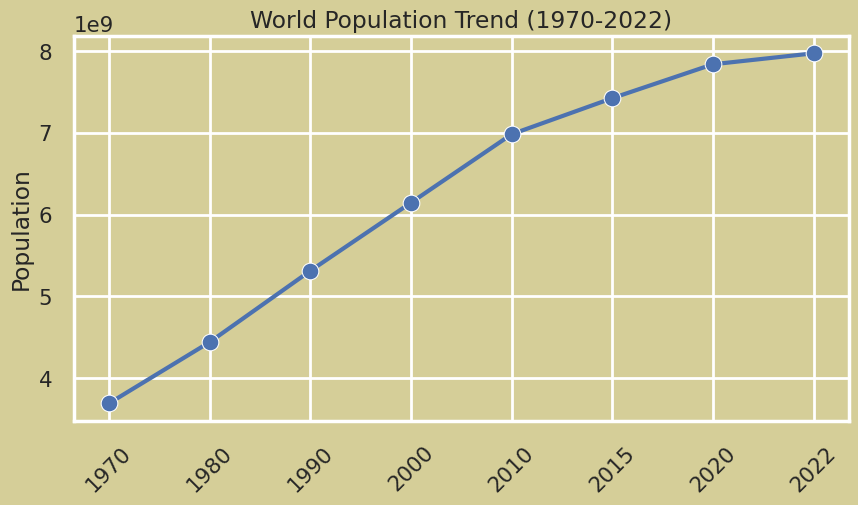

In [21]:
# World Population Trend (1970-2022)
plt.subplots(figsize=(10,5))
trend = world_population.iloc[:,5:13].sum()[::-1]
sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("World Population Trend (1970-2022)")
plt.show()

Population Growth Rate

In [22]:
# average population growth rate

world_population['Growth Rate'].mean()

1.0095773504273504

In [23]:
# creating dataframe for top 10 countries with highest growth rate

gwr_top10 = world_population.sort_values(by='Country').sort_values(by='Growth Rate', ascending=False).head(10)

gwr_top10.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33


Let's have a look on the population growth rate :


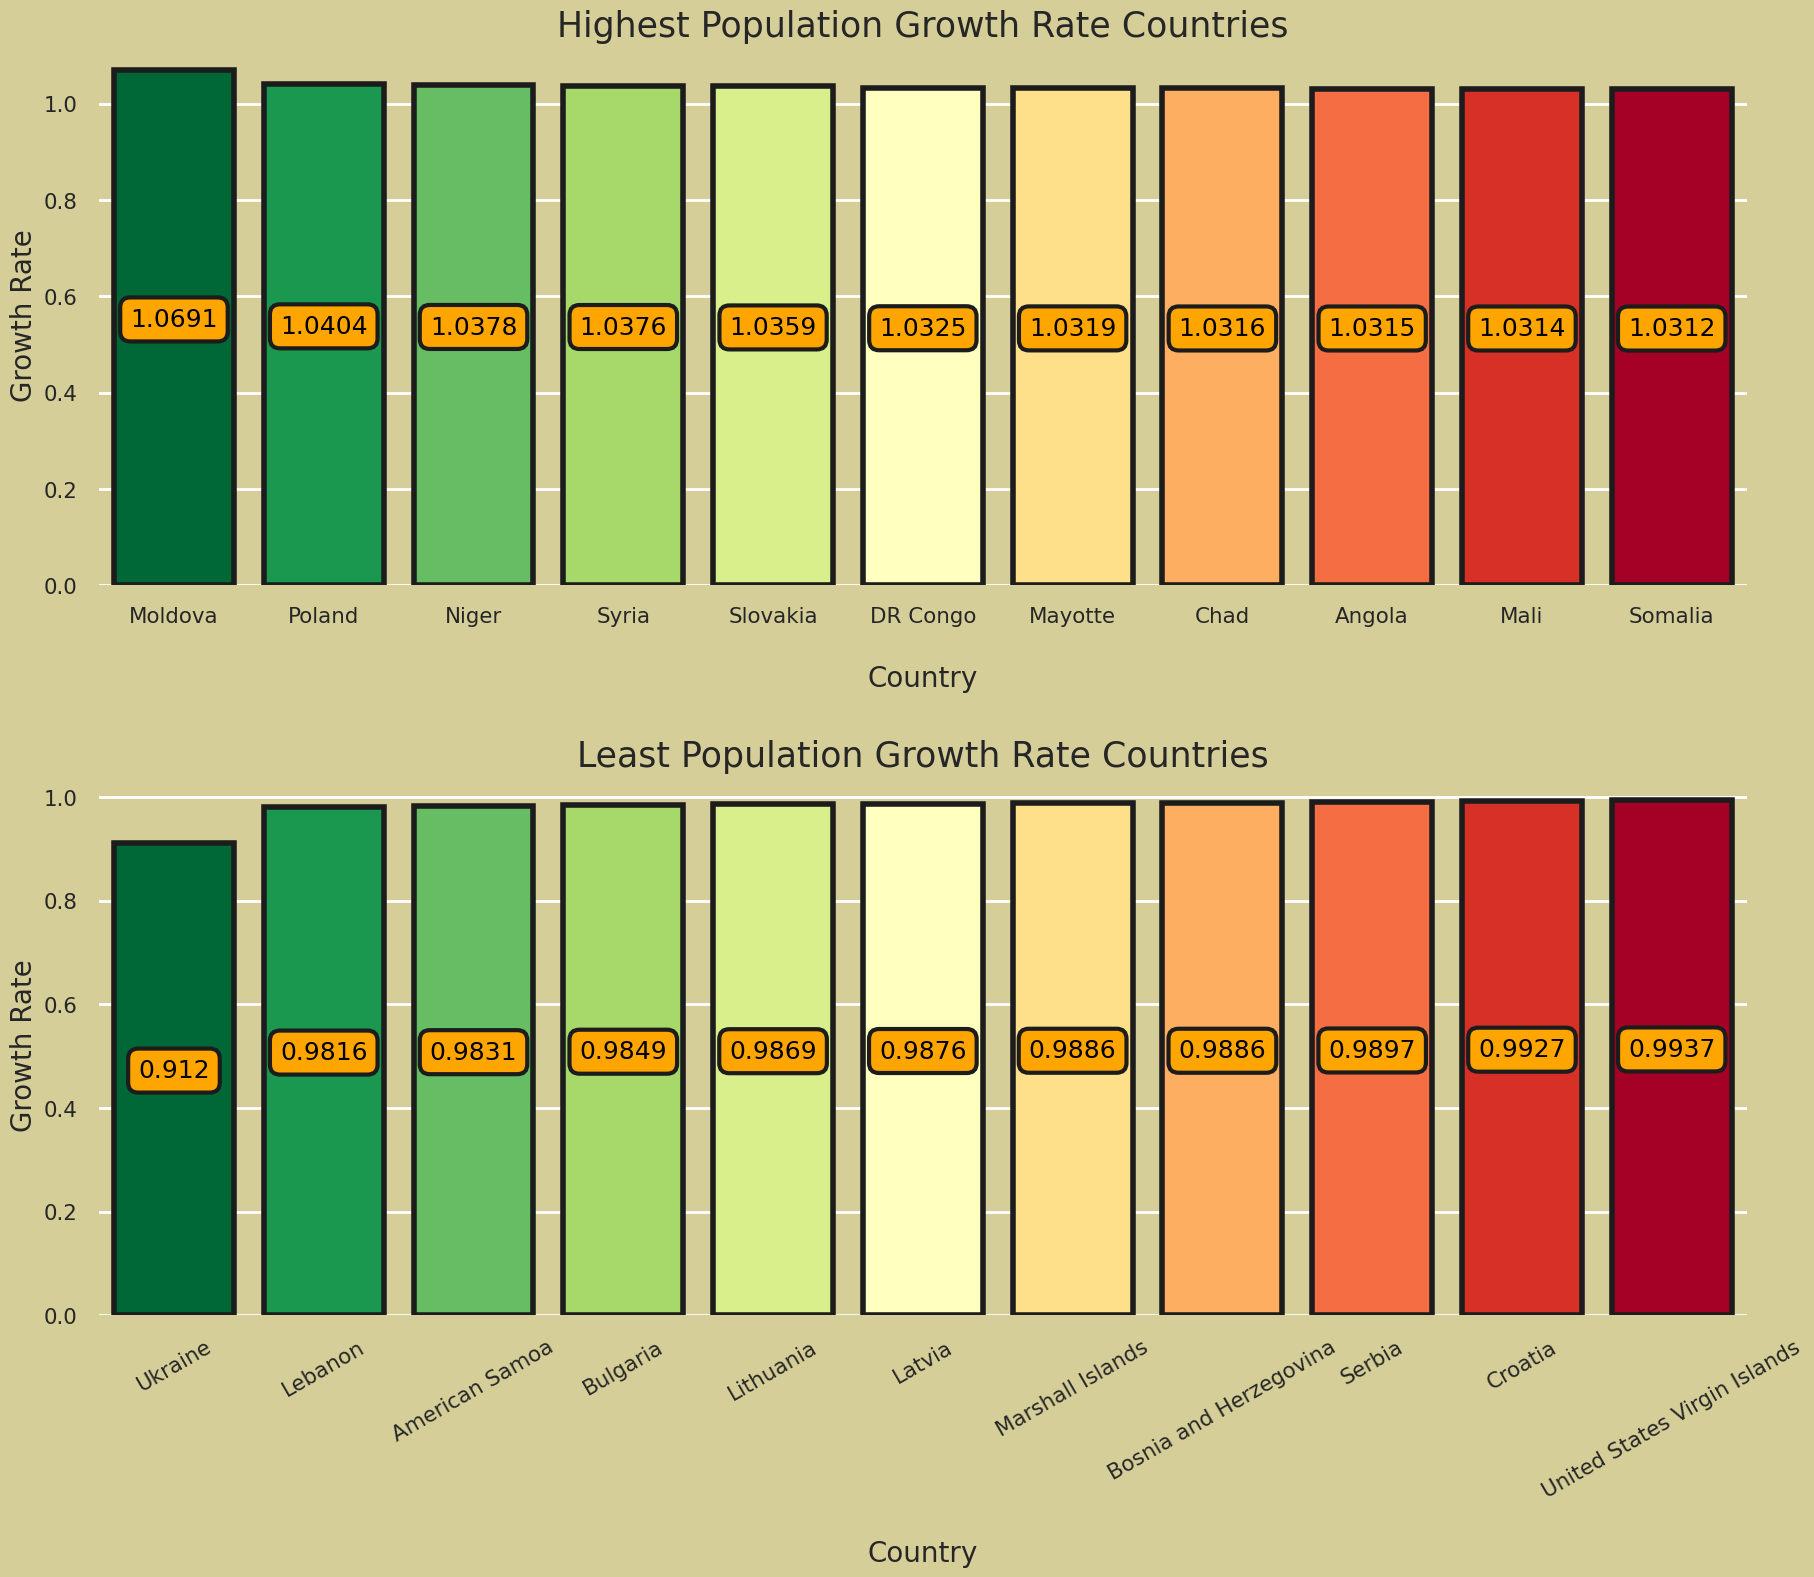

In [24]:
print(f"Let's have a look on the population growth rate :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=world_population["Country"],y=world_population["Growth Rate"],order=world_population.sort_values("Growth Rate",ascending=False)["Country"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Highest Population Growth Rate Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Growth Rate",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=world_population["Country"],y=world_population["Growth Rate"],order=world_population.sort_values("Growth Rate",ascending=True)["Country"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Population Growth Rate Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Growth Rate",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 30)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the continent-wise average population growth rate :


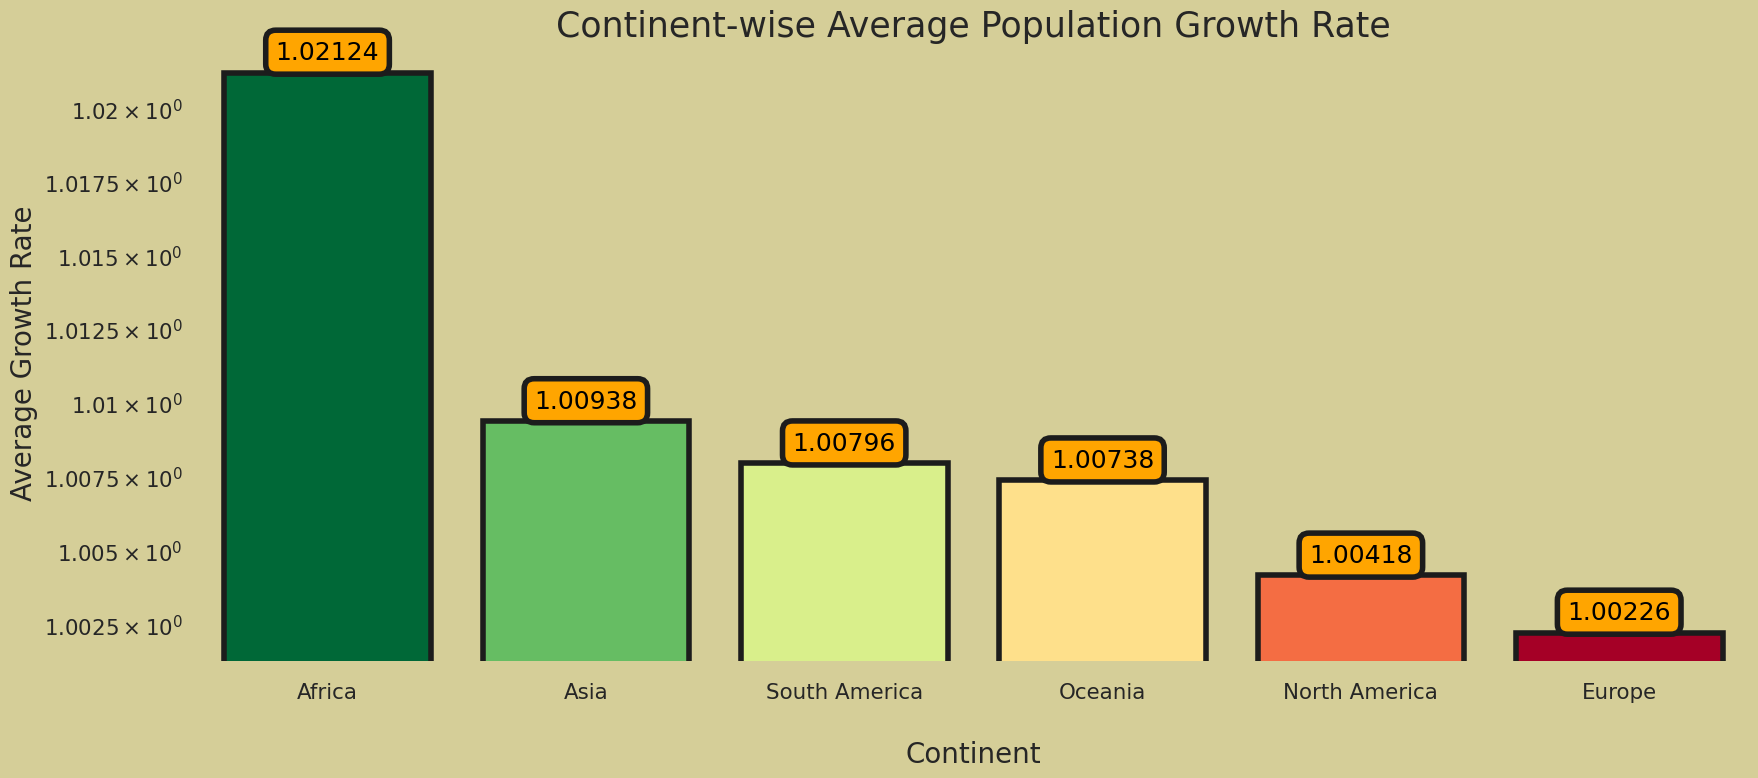

In [25]:
world_gr = world_population.copy()
world_gr = pd.DataFrame(world_gr.groupby(["Continent"])["Growth Rate"].mean())

print("Let's have a look on the continent-wise average population growth rate :")
plt.subplots(figsize=(20,8))
p=sns.barplot(x=world_gr.index, y=world_gr["Growth Rate"],order=world_gr.sort_values("Growth Rate",ascending=False).index,palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Average Population Growth Rate",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Average Growth Rate",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

# Population

In [26]:
world_pop = world_population.copy()
world_pop.set_index('Country', inplace=True)
world_pop.sort_values(by='2022', ascending=True, inplace=True)

world_top10 = world_pop['2022'].tail(10)
world_top10

Country
Mexico            127504125
Russia            144713314
Bangladesh        171186372
Brazil            215313498
Nigeria           218541212
Pakistan          235824862
Indonesia         275501339
United States     338289857
India            1417173173
China            1425887337
Name: 2022, dtype: int64

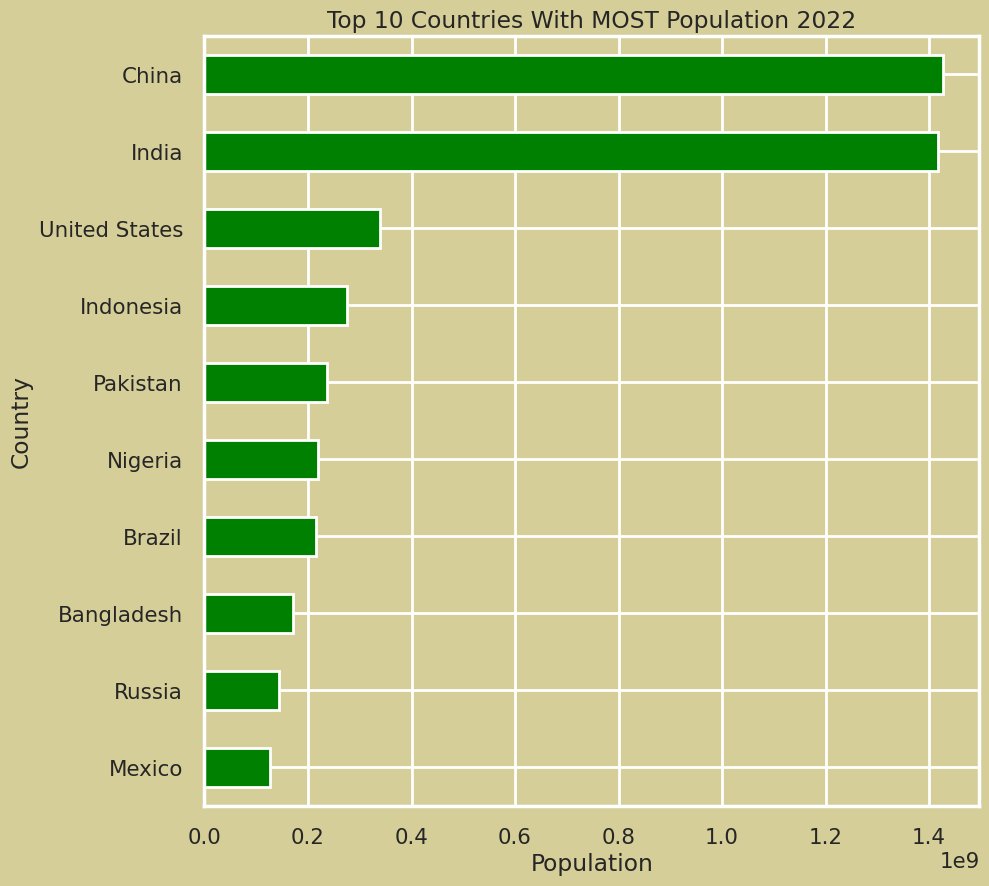

In [27]:
# plotting top 10 MOST populated countries

world_top10.plot(kind='barh', figsize=(10, 10), color='green')
plt.xlabel('Population')
plt.title('Top 10 Countries With MOST Population 2022')

plt.show()

In [28]:
world_pop.sort_values(by='2022', ascending=True, inplace=True)

world_btm10 = world_pop['2022'].head(10)
world_btm10

Country
Vatican City                   510
Tokelau                       1871
Niue                          1934
Falkland Islands              3780
Montserrat                    4390
Saint Pierre and Miquelon     5862
Saint Barthelemy             10967
Tuvalu                       11312
Wallis and Futuna            11572
Nauru                        12668
Name: 2022, dtype: int64

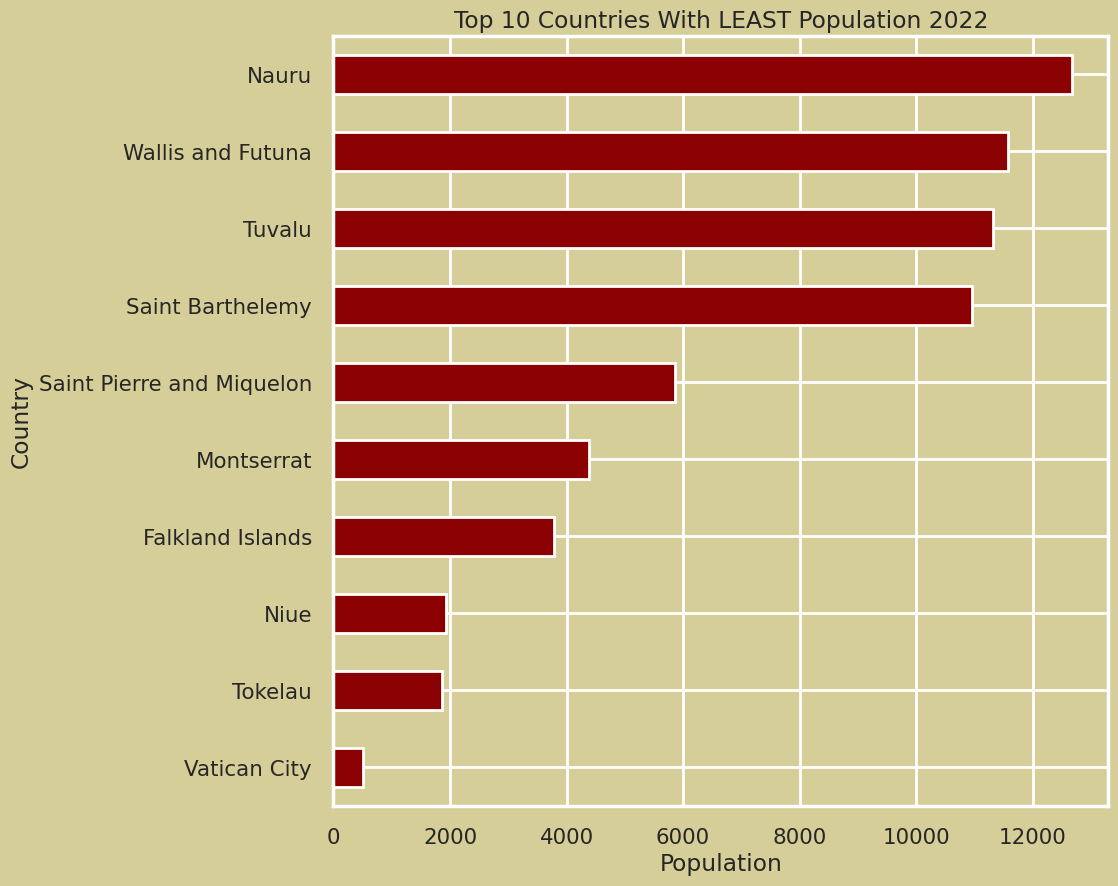

In [29]:
world_btm10.plot(kind='barh', figsize=(10, 10), color='darkred')
plt.xlabel('Population')
plt.title('Top 10 Countries With LEAST Population 2022')

plt.show()

# Area

Let's have a look on the continent-wise population in 2022 :


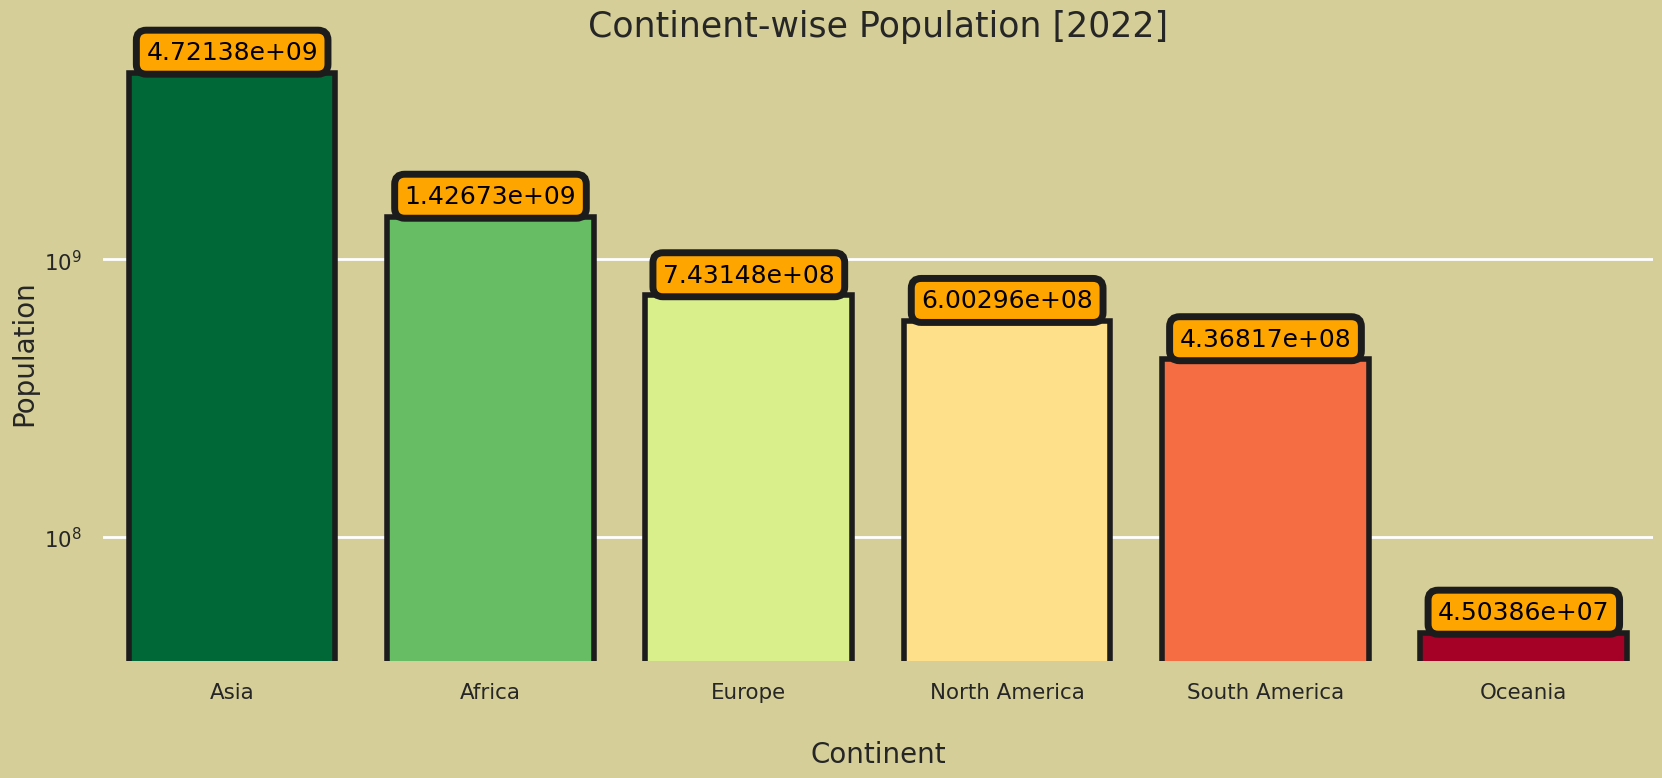

In [30]:
world_pop = pd.DataFrame(world_pop.groupby(["Continent"])["1970","1980","1990","2000","2010","2015","2020","2022"].sum())
print("Let's have a look on the continent-wise population in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(x=world_pop.index, y=world_pop["2022"],order=world_pop.sort_values("2022",ascending=False).index,palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Population [2022]",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the ratios of continent-wise population in 2022 :


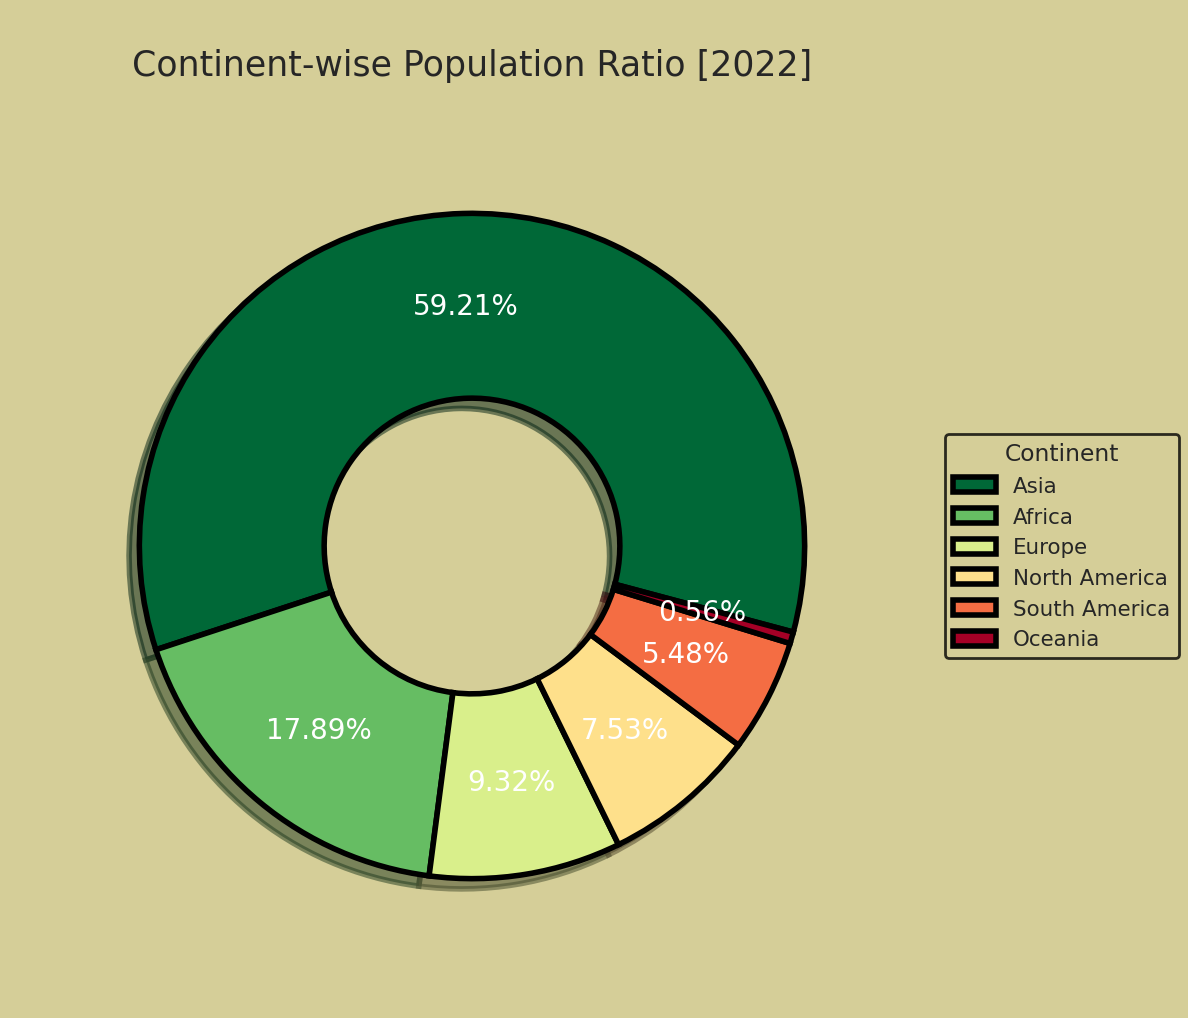

In [31]:
print(f"Let's have a look on the ratios of continent-wise population in 2022 :")
plt.subplots(figsize=(12, 12))

labels = "Asia","Africa","Europe","North America","South America","Oceania"
size = 0.5

wedges, texts, autotexts = plt.pie([world_pop.sort_values("2022",ascending=False)["2022"][0],
                                    world_pop.sort_values("2022",ascending=False)["2022"][1],
                                    world_pop.sort_values("2022",ascending=False)["2022"][2],
                                    world_pop.sort_values("2022",ascending=False)["2022"][3],
                                    world_pop.sort_values("2022",ascending=False)["2022"][4],
                                    world_pop.sort_values("2022",ascending=False)["2022"][5]],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = palette[0:11:2],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = -15)

plt.legend(wedges, labels, title="Continent",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nContinent-wise Population Ratio [2022]",fontsize=25)
plt.show()

Population in Asia in 2022 :


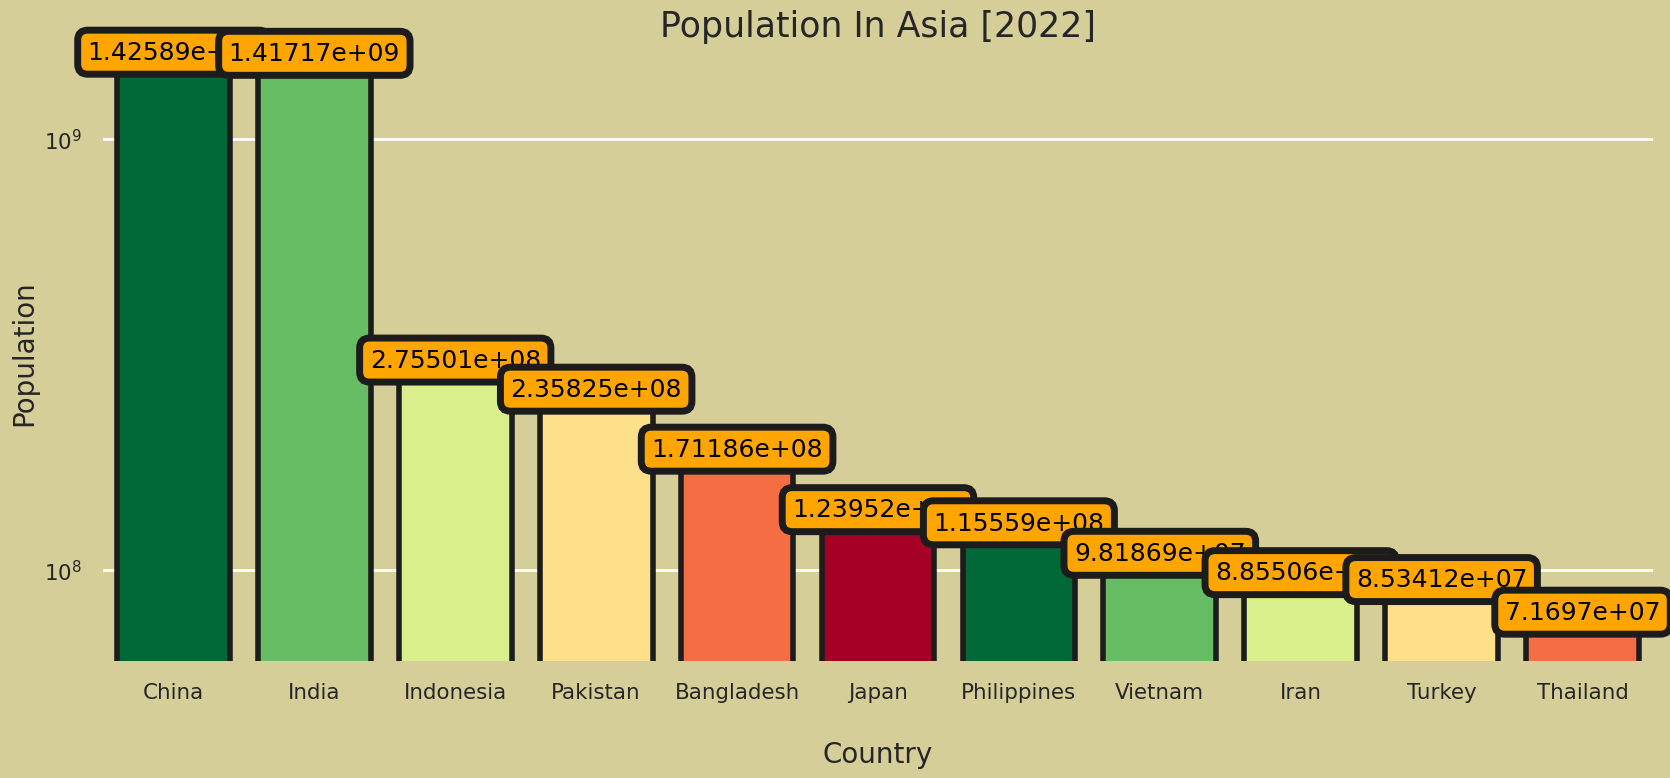

In [32]:
print("Population in Asia in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=world_population[world_population["Continent"]=="Asia"],x="Country", y="2022",order=world_population[world_population["Continent"]=="Asia"].sort_values("2022",ascending=False)["Country"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Asia [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in Africa in 2022 :


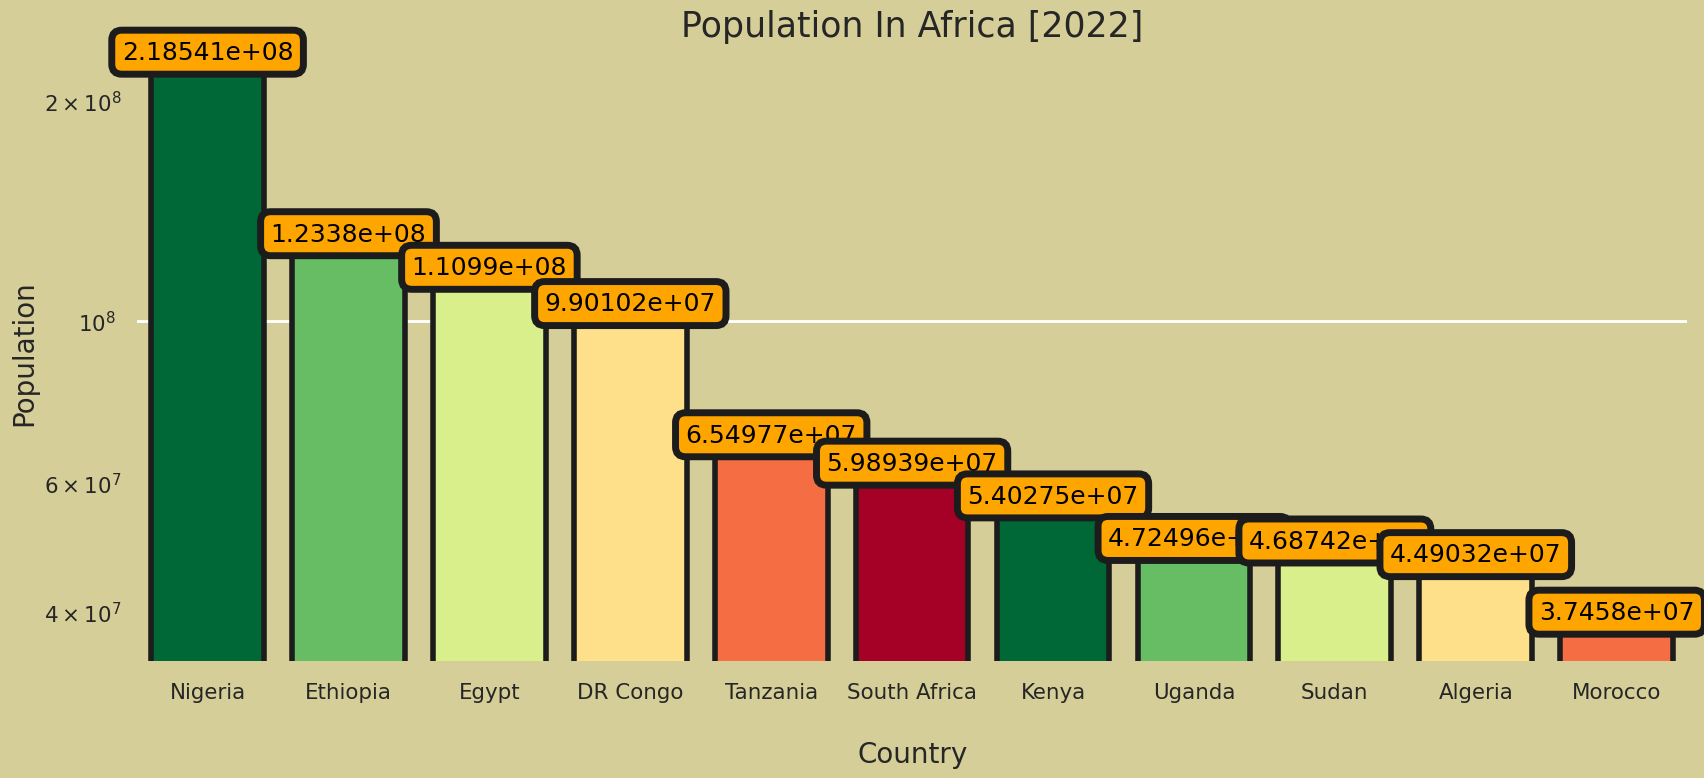

In [33]:
print("Population in Africa in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=world_population[world_population["Continent"]=="Africa"],x="Country", y="2022",order=world_population[world_population["Continent"]=="Africa"].sort_values("2022",ascending=False)["Country"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Africa [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in Europe in 2022 :


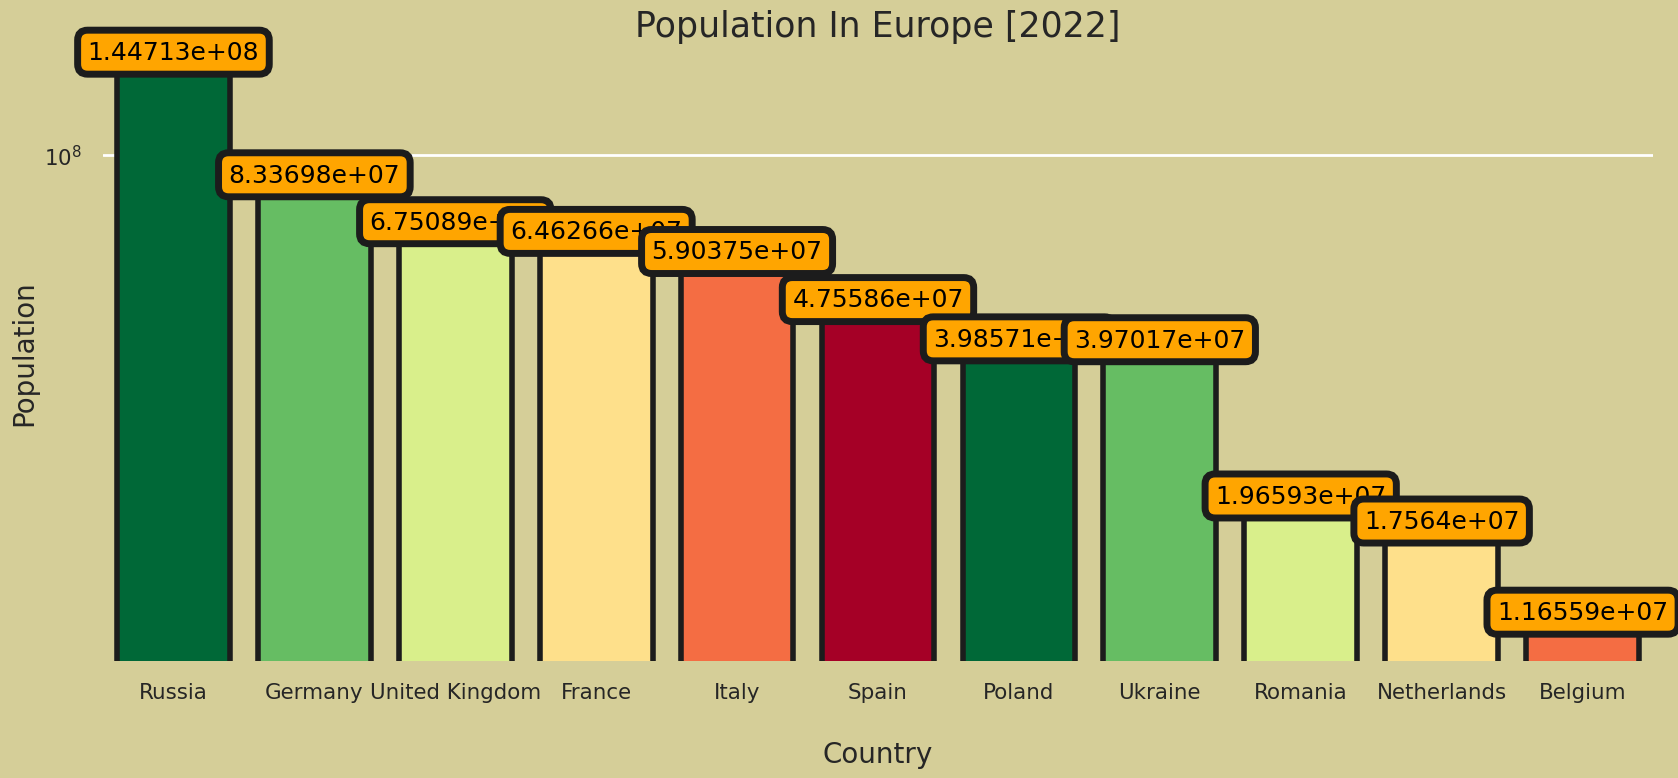

In [34]:
print("Population in Europe in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=world_population[world_population["Continent"]=="Europe"],x="Country", y="2022",order=world_population[world_population["Continent"]=="Europe"].sort_values("2022",ascending=False)["Country"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Europe [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in North America in 2022 :


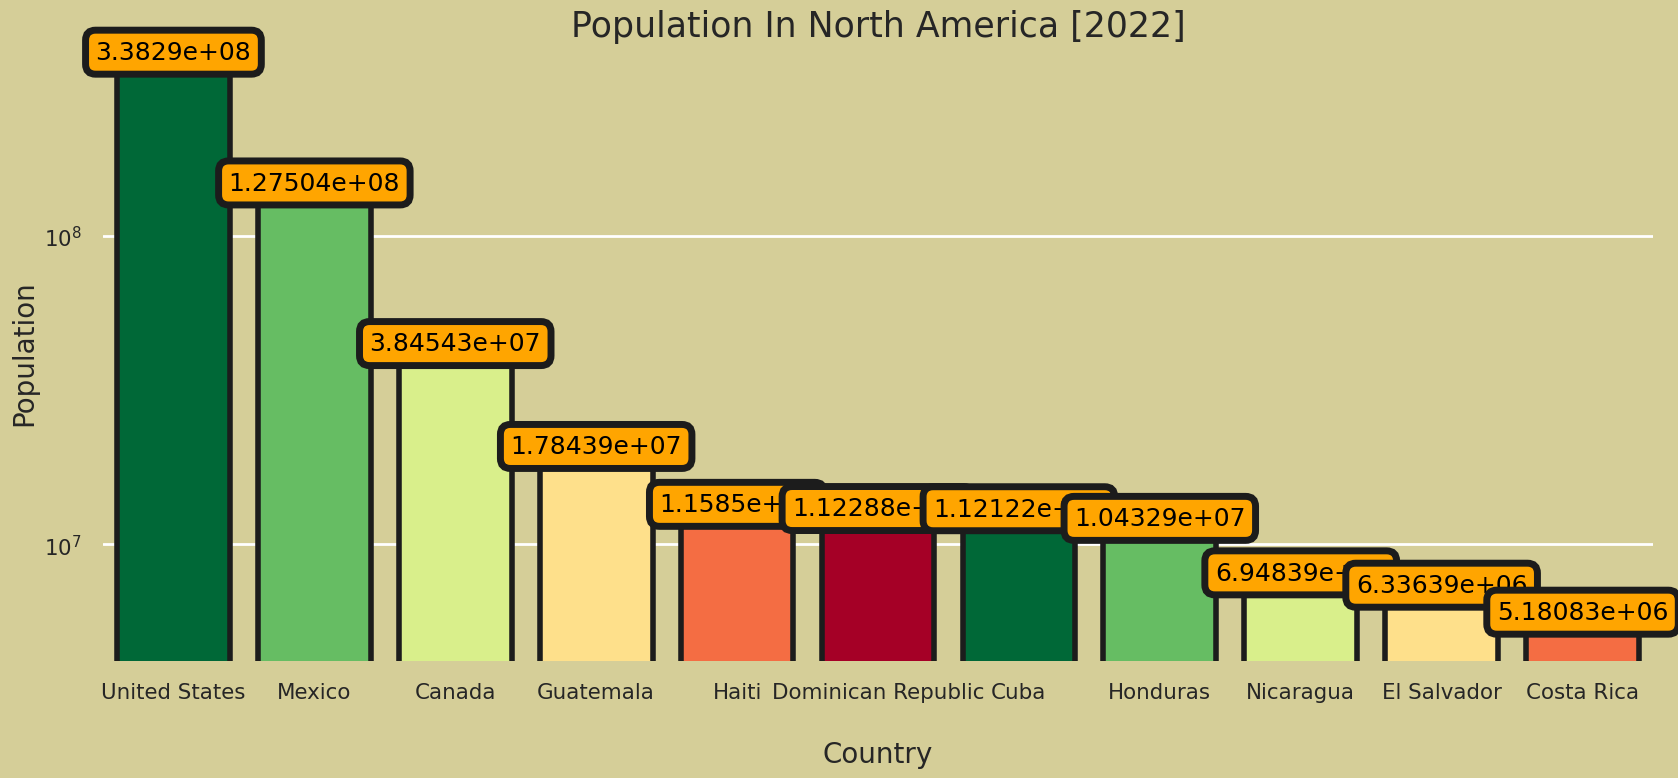

In [35]:
print("Population in North America in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=world_population[world_population["Continent"]=="North America"],x="Country", y="2022",order=world_population[world_population["Continent"]=="North America"].sort_values("2022",ascending=False)["Country"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In North America [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in South America in 2022 :


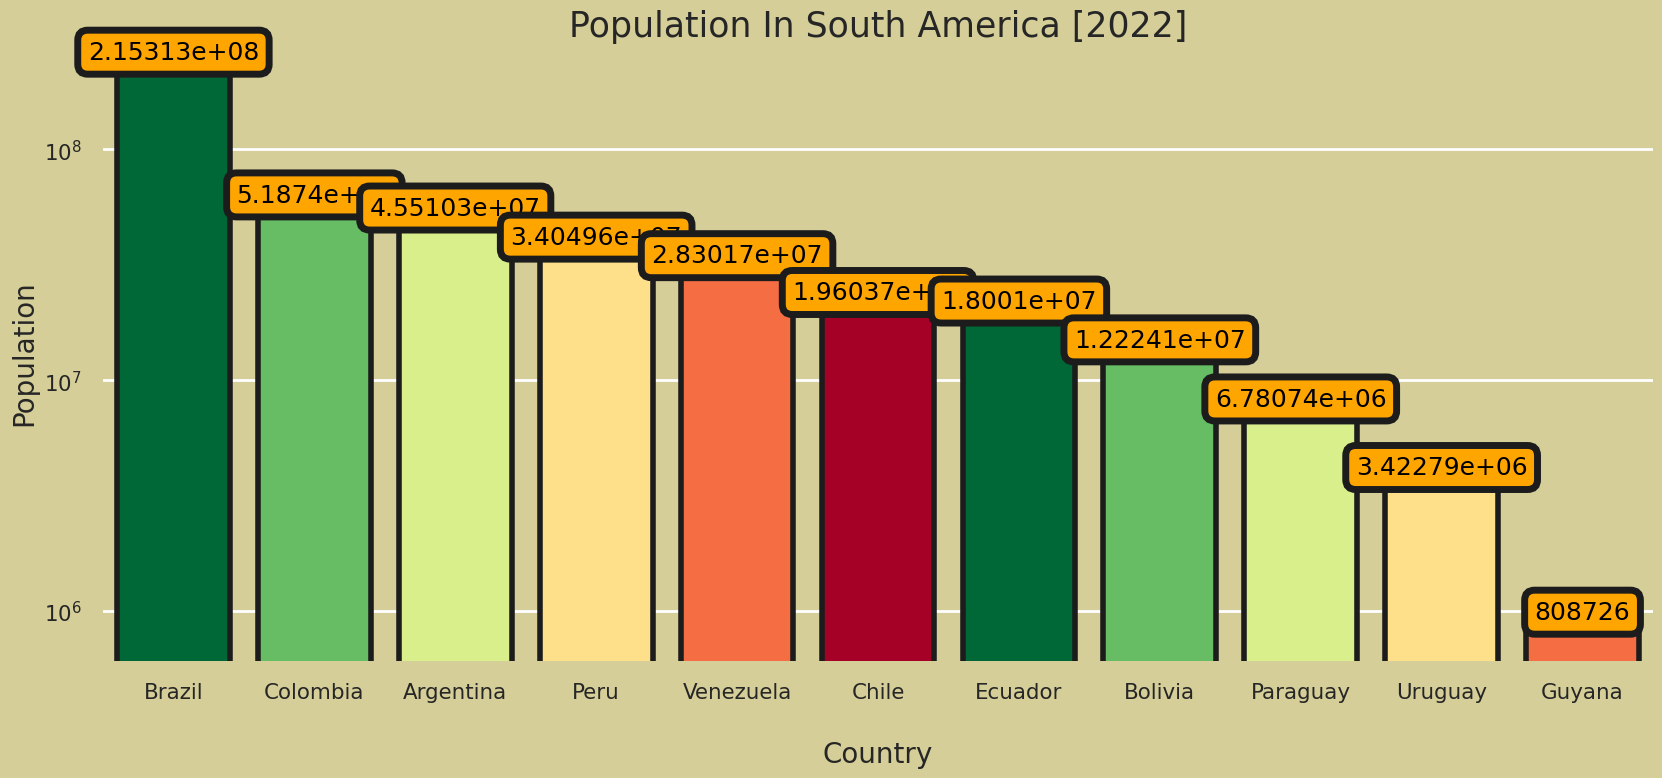

In [36]:
print("Population in South America in 2022 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=world_population[world_population["Continent"]=="South America"],x="Country", y="2022",order=world_population[world_population["Continent"]=="South America"].sort_values("2022",ascending=False)["Country"][:11],palette=palette[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In South America [2022]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the timeline of continent-wise population :


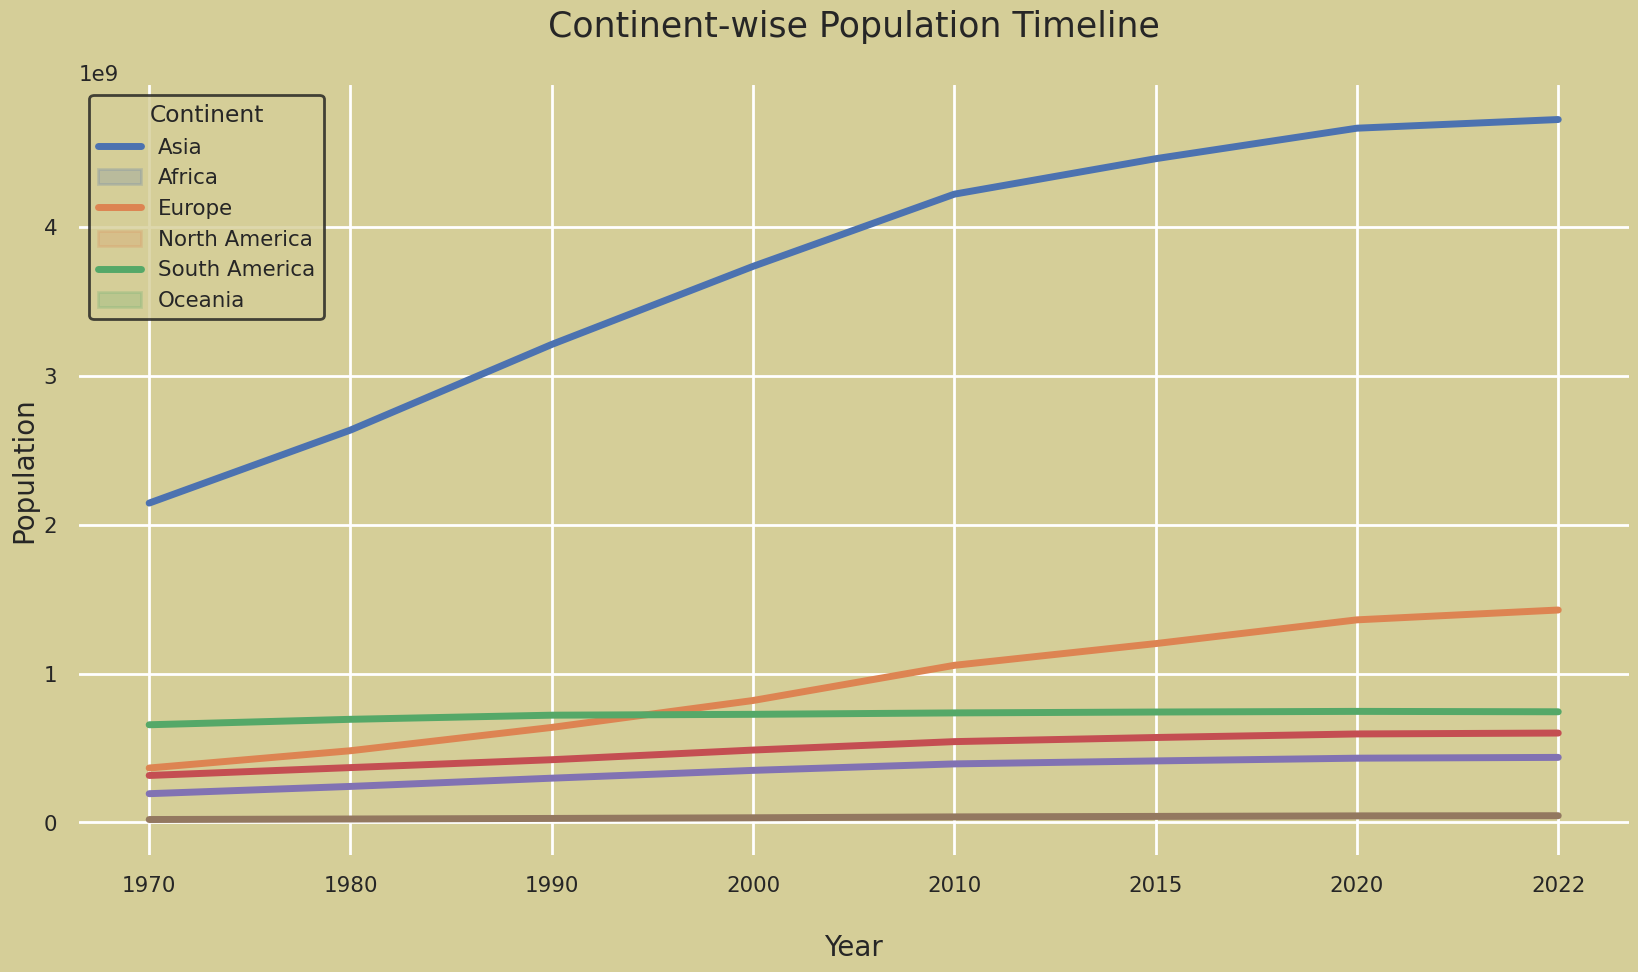

In [37]:
print(f"Let's have a look on the timeline of continent-wise population :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=world_pop.T.index ,y=world_pop.T["Asia"],data=world_pop.T,ax=axs,linewidth=5,markersize=20)
sns.lineplot(x=world_pop.T.index ,y=world_pop.T["Africa"],data=world_pop.T,ax=axs,linewidth=5,markersize=20)
sns.lineplot(x=world_pop.T.index ,y=world_pop.T["Europe"],data=world_pop.T,ax=axs,linewidth=5,markersize=20)
sns.lineplot(x=world_pop.T.index ,y=world_pop.T["North America"],data=world_pop.T,ax=axs,linewidth=5,markersize=20)
sns.lineplot(x=world_pop.T.index ,y=world_pop.T["South America"],data=world_pop.T,ax=axs,linewidth=5,markersize=20)
sns.lineplot(x=world_pop.T.index ,y=world_pop.T["Oceania"],data=world_pop.T,ax=axs,linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

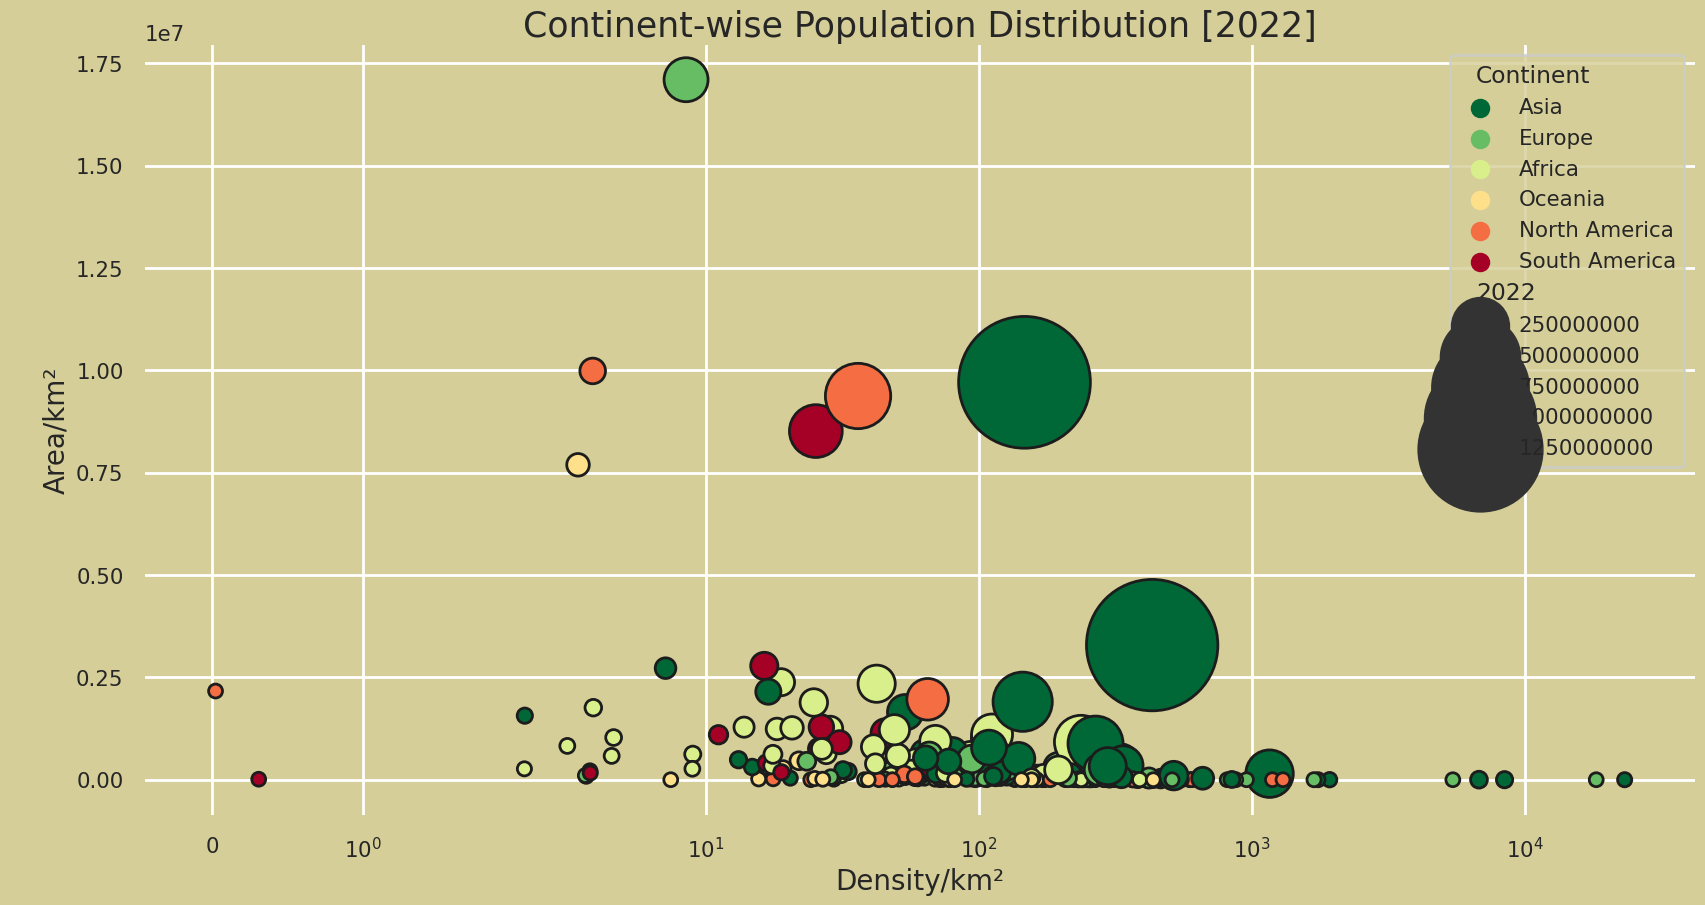

In [38]:
plt.subplots(figsize=(20,10))
p=sns.scatterplot(x=world_population["Density (per km²)"], y=world_population["Area (km²)"], hue=world_population["Continent"],size=world_population["2022"],palette=palette[0:11:2], edgecolor = "#1c1c1c", linewidth = 2,sizes=(100, 9000),alpha=1)
p.set_xscale("symlog")
p.set_yscale("linear")
p.set_title("Continent-wise Population Distribution [2022]",fontsize=25)
p.set_xlabel("Density/km²",fontsize=20)
p.set_ylabel("\nArea/km²",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

# Population Density

Let's have a look on the population density :


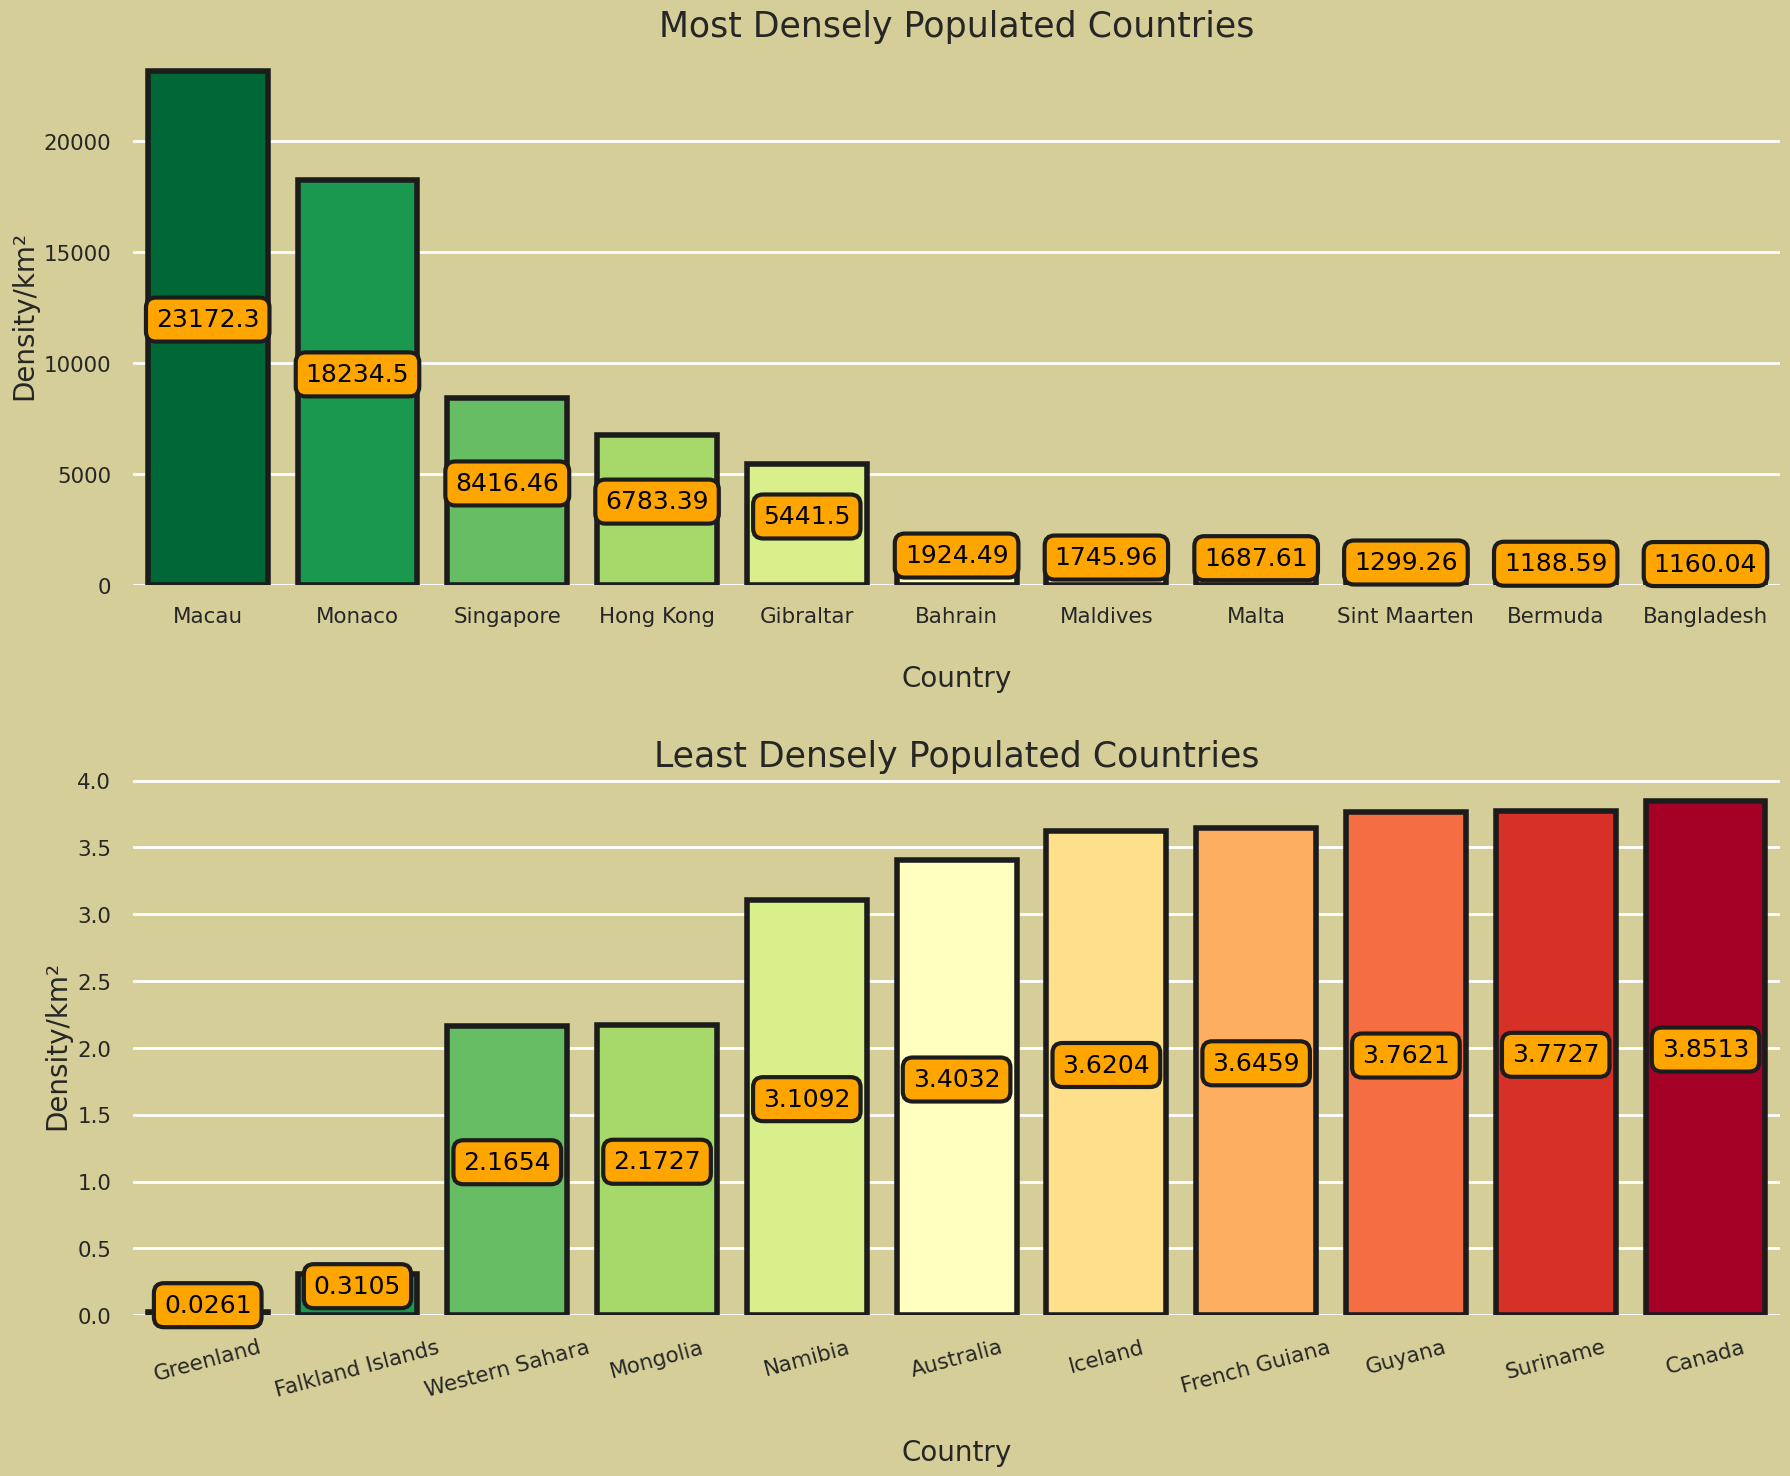

In [39]:
print(f"Let's have a look on the population density :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=world_population["Country"],y=world_population["Density (per km²)"],order=world_population.sort_values("Density (per km²)",ascending=False)["Country"][:11],ax=axs[0],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Most Densely Populated Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Density/km²",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=world_population["Country"],y=world_population["Density (per km²)"],order=world_population.sort_values("Density (per km²)",ascending=True)["Country"][:11],ax=axs[1],palette=palette, saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Densely Populated Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Density/km²",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 15)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the timeline of continent-wise population density :


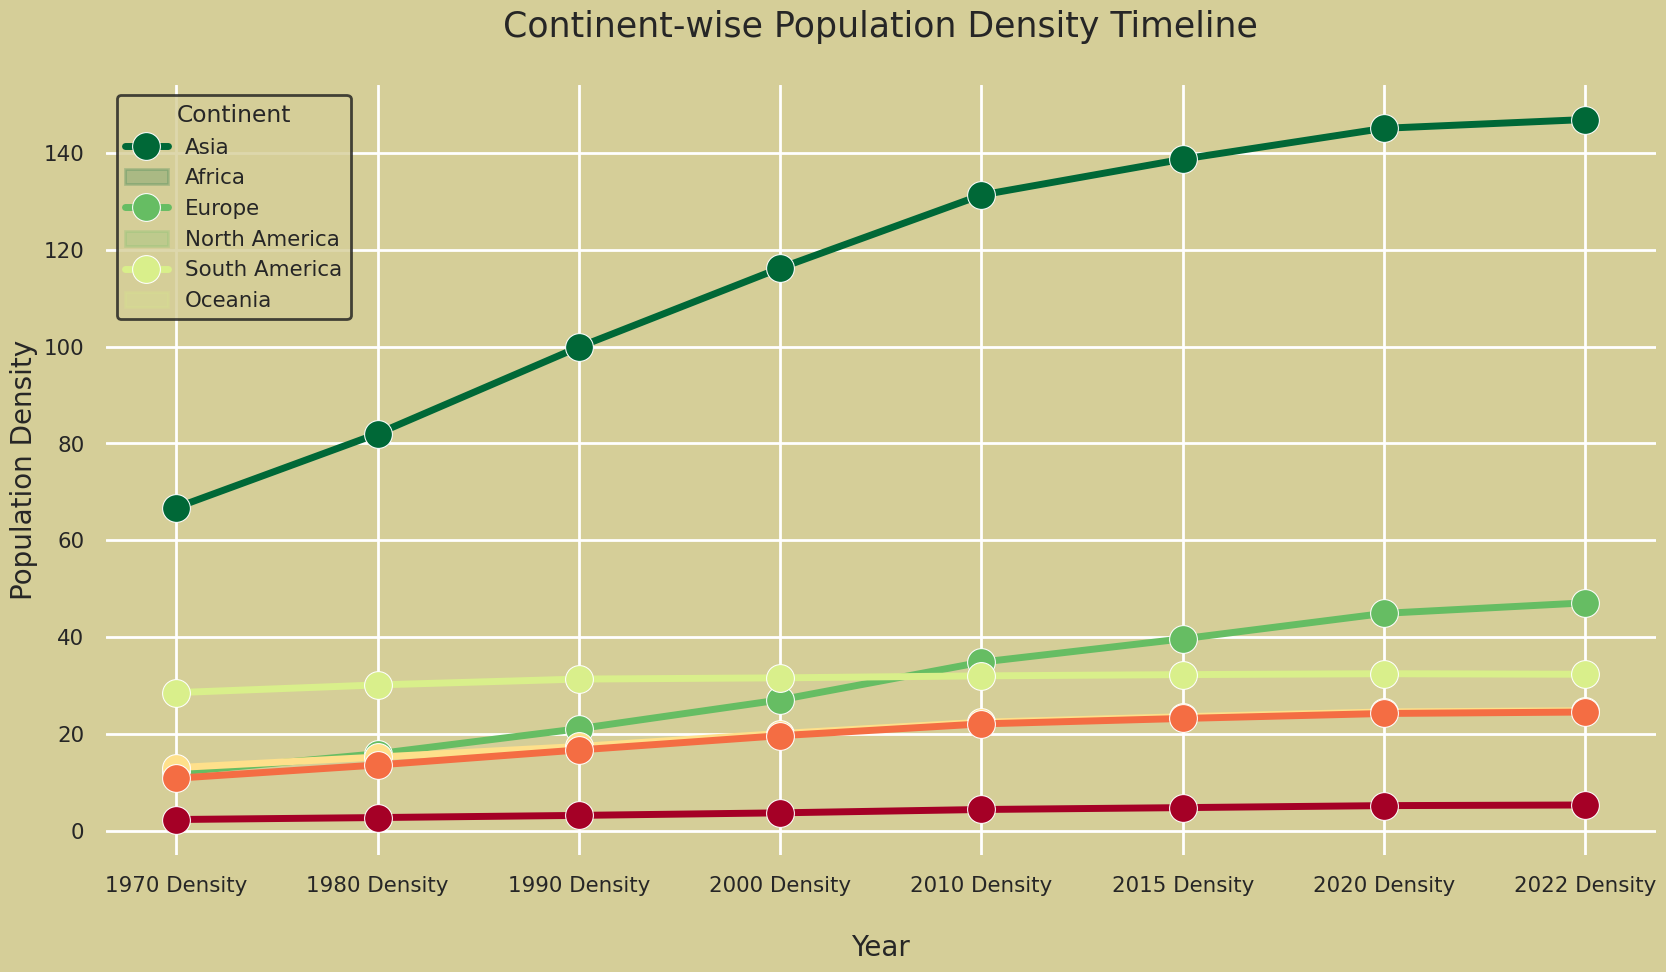

In [40]:
data_den = world_population.copy()
data_den = pd.DataFrame(data_den.groupby(["Continent"])["1970","1980","1990","2000","2010","2015","2020","2022","Area (km²)"].sum())
col = ["1970","1980","1990","2000","2010","2015","2020","2022"]
for i in col:
    data_den[i] = data_den[i]/data_den["Area (km²)"]
data_den.rename(columns={"1970":"1970 Density","1980":"1980 Density","1990":"1990 Density","2000":"2000 Density","2010":"2010 Density","2015":"2015 Density","2020":"2020 Density","2022":"2022 Density"},inplace=True)
data_den.drop(columns="Area (km²)",inplace=True)


print(f"Let's have a look on the timeline of continent-wise population density :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_den.T.index ,y=data_den.T["Asia"],data=data_den.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Africa"],data=data_den.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Europe"],data=data_den.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["North America"],data=data_den.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["South America"],data=data_den.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Oceania"],data=data_den.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Density Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population Density",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

# Correlation Map

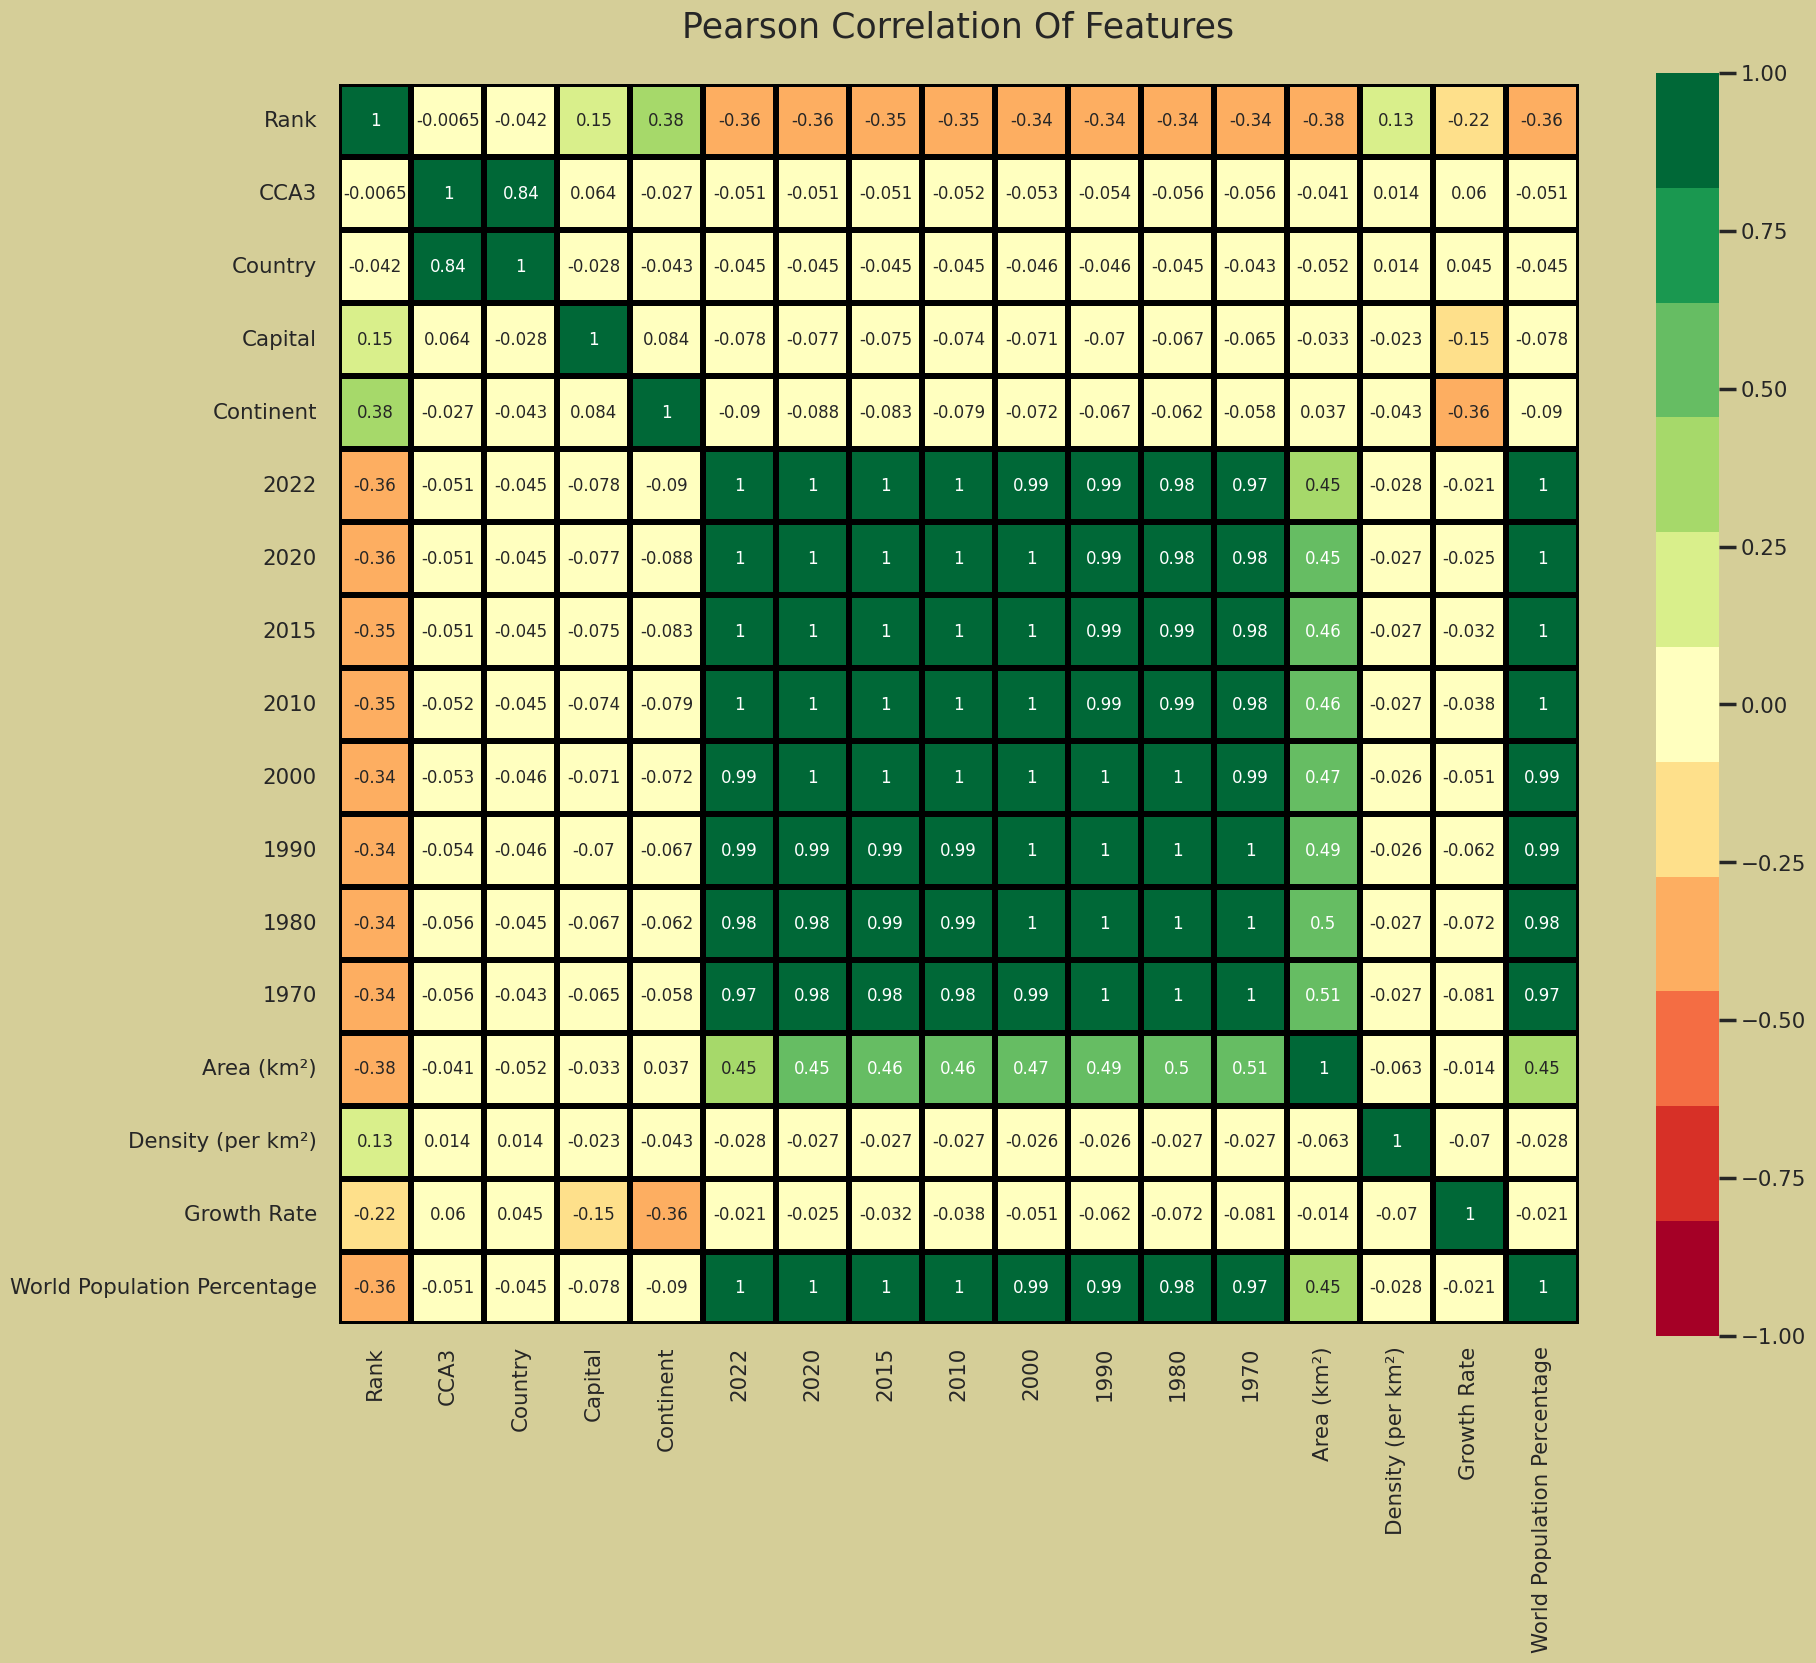

In [41]:
catcol = ["CCA3","Country","Capital","Continent"]
le = LabelEncoder()
for col in catcol:
        world_population[col] = le.fit_transform(world_population[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(world_population.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='black',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

# Predict population

# Predict population in 2022

In [42]:
world_population.head(5)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,1,0,89,1,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,4,1,211,2,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,57,2,4,0,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,9,3,150,4,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,5,4,8,2,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [43]:
y = world_population['2022']
X = world_population[['World Population Percentage', 'Growth Rate', 'Density (per km²)', 'Area (km²)', '1970', '1980', '1990', '2000', '2010', '2015', '2020']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Predict population in 2022 using Linear Regression

In [45]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor.intercept_

-4664625.145766035

In [47]:
regressor.coef_

array([ 5.79433164e+07,  4.64148074e+06,  8.53060030e+00,  2.41571111e-02,
        6.00292906e-03, -1.67166253e-02,  9.14458418e-03, -4.98870504e-03,
       -2.23174794e-02, -5.93680129e-02,  3.57696122e-01])

In [48]:
feature_names = X.columns
feature_names

Index(['World Population Percentage', 'Growth Rate', 'Density (per km²)',
       'Area (km²)', '1970', '1980', '1990', '2000', '2010', '2015', '2020'],
      dtype='object')

In [49]:
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,
                              index = feature_names,
                              columns = ['Coefficient value'])
print(coefficients_df)

                             Coefficient value
World Population Percentage       5.794332e+07
Growth Rate                       4.641481e+06
Density (per km²)                 8.530600e+00
Area (km²)                        2.415711e-02
1970                              6.002929e-03
1980                             -1.671663e-02
1990                              9.144584e-03
2000                             -4.988705e-03
2010                             -2.231748e-02
2015                             -5.936801e-02
2020                              3.576961e-01


In [50]:
y_predL = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predL})
print(results)

        Actual     Predicted
199     618040  7.665263e+05
69      304557  1.729408e+05
233   16320537  1.609491e+07
39    17723315  1.771140e+07
138   37457971  3.745449e+07
174      47657 -3.634283e+03
90     9967308  9.663708e+06
67     5540745  5.545785e+06
119     695168  1.003354e+06
73     3744385  3.867815e+06
211    1531044  1.571528e+06
188      44175  1.427875e+04
179     222382  1.133457e+05
117    2750055  2.396149e+06
85     2105566  2.389997e+06
4        79824  4.635822e+04
231   33696614  3.364634e+07
89     7488865  7.290835e+06
147    6948392  7.146227e+06
170   19659267  1.971645e+07
209       1871  3.394595e+04
99    59037474  5.883350e+07
34    27914536  2.798254e+07
127     367507  6.202784e+04
38     5579144  5.652016e+06
176      31791 -3.200413e+04
172   13776698  1.368419e+07
106   54027487  5.422594e+07
225     326740  1.764138e+05
196   47558630  4.763726e+07
102  123951692  1.233273e+08
228   98186856  9.802288e+07
210     106858  4.300730e+04
31    22673762

In [51]:
# predicting the accuracy score
mae = mean_absolute_percentage_error(y_test, y_predL)
rmspe = np.sqrt(np.nanmean(np.square(((y_test - y_predL) / y_test))))*100
score=r2_score(y_test,y_predL)
print(f'Mean absolute percentage error: {mae:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f}')
print('R2 score is ',score)

Mean absolute percentage error: 0.60
Root mean squared percentage error: 255.05
R2 score is  0.9999430128618959


Predict population in 2022 using Decision Tree

In [52]:
regressorD = DecisionTreeRegressor()
regressorD.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_predD = regressorD.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predD})
print(results)

        Actual    Predicted
199     618040     647599.0
69      304557     289950.0
233   16320537   17316449.0
39    17723315   17597511.0
138   37457971   36408820.0
174      47657      44273.0
90     9967308    9952787.0
67     5540745    5643453.0
119     695168     724273.0
73     3744385    3684032.0
211    1531044    1299469.0
188      44175      39327.0
179     222382     227380.0
117    2750055    3272996.0
85     2105566    2305825.0
4        79824      68706.0
231   33696614   33475870.0
89     7488865    7221365.0
147    6948392    6780744.0
170   19659267   23893394.0
209       1871       1934.0
99    59037474   59893885.0
34    27914536   28160542.0
127     367507     395752.0
38     5579144    5180829.0
176      31791      33660.0
172   13776698   13859341.0
106   54027487   51815810.0
225     326740     326101.0
196   47558630   45510318.0
102  123951692  144713314.0
228   98186856  110990103.0
210     106858     103948.0
31    22673762   22593590.0
18     9534954   103

In [54]:
# predicting the accuracy score
mae = mean_absolute_percentage_error(y_test, y_predD)
rmspe = np.sqrt(np.nanmean(np.square(((y_test - y_predD) / y_test))))*100
score=r2_score(y_test,y_predD)
print(f'Mean absolute percentage error: {mae:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f}')
print('R2 score is ',score)

Mean absolute percentage error: 0.06
Root mean squared percentage error: 7.65
R2 score is  0.978441263138272


Predict population in 2022 using Random Forest

In [55]:

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_predR = regr.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predR})
print(results)

        Actual     Predicted
199     618040  6.509301e+05
69      304557  2.827631e+05
233   16320537  1.762222e+07
39    17723315  1.732179e+07
138   37457971  3.724932e+07
174      47657  4.611980e+04
90     9967308  1.005049e+07
67     5540745  5.815851e+06
119     695168  6.762783e+05
73     3744385  3.886169e+06
211    1531044  1.507627e+06
188      44175  3.837146e+04
179     222382  2.298033e+05
117    2750055  2.985591e+06
85     2105566  2.025811e+06
4        79824  6.728532e+04
231   33696614  3.404762e+07
89     7488865  7.616072e+06
147    6948392  6.769338e+06
170   19659267  2.160368e+07
209       1871  2.670020e+03
99    59037474  6.439620e+07
34    27914536  2.723606e+07
127     367507  4.263706e+05
38     5579144  5.371033e+06
176      31791  3.513092e+04
172   13776698  1.340335e+07
106   54027487  4.962775e+07
225     326740  3.006141e+05
196   47558630  4.753081e+07
102  123951692  1.447346e+08
228   98186856  1.054727e+08
210     106858  1.117117e+05
31    22673762

In [57]:
# predicting the accuracy score
mae = mean_absolute_percentage_error(y_test, y_predR)
rmspe = np.sqrt(np.nanmean(np.square(((y_test - y_predR) / y_test))))*100
score=r2_score(y_test,y_predR)
print(f'Mean absolute percentage error: {mae:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f}')
print('R2 score is ',score)

Mean absolute percentage error: 0.10
Root mean squared percentage error: 20.21
R2 score is  0.9150482649045858


Decision tree for feature importance on a regression problem

Feature: 0, Score: 0.00178
Feature: 1, Score: 0.00008
Feature: 2, Score: 0.00048
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00257
Feature: 9, Score: 0.00048
Feature: 10, Score: 0.99458


Text(0.5, 1.0, 'Feature Importance')

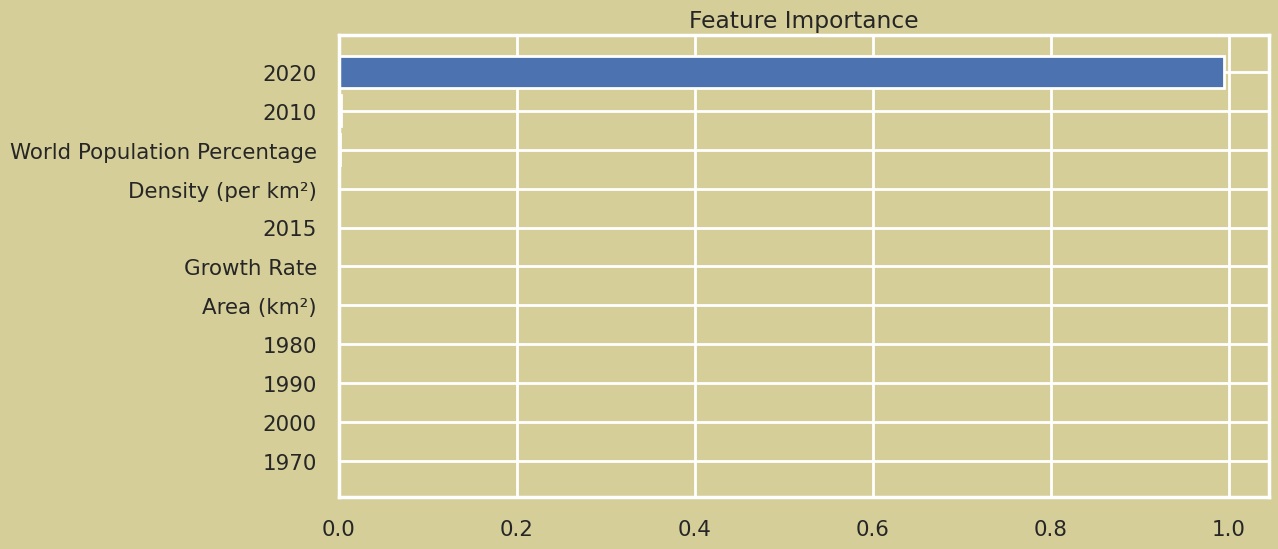

In [58]:
# Print the feature importances
feature_importance = regressorD.feature_importances_
# summarize feature importance
for i,v in enumerate(feature_importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
